# Compute Drawdowns

In [1]:
import pandas as pd

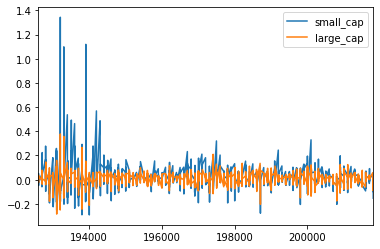

In [8]:
me_m = pd.read_csv("data/Portfolios_Formed_on_ME_monthly_EW.csv",
                   index_col=0, parse_dates=True, na_values=-99.99)

rets = me_m[["Lo 10", "Hi 10"]]
rets.columns = ["small_cap", "large_cap"]
rets = rets/100
rets.plot.line()

In [9]:
rets.head()

,small_cap,large_cap
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


In [10]:
rets.index

Int64Index([192607, 192608, 192609, 192610, 192611, 192612, 192701, 192702,
            192703, 192704,
            ...
            201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810,
            201811, 201812],
           dtype='int64', length=1110)

In [11]:
rets.index = pd.to_datetime(rets.index, format="%Y%m")

In [12]:
rets.head()

,small_cap,large_cap
1926-07-01,-0.0145,0.0329
1926-08-01,0.0512,0.0370
1926-09-01,0.0093,0.0067
1926-10-01,-0.0484,-0.0243
1926-11-01,-0.0078,0.0270


In [13]:
rets.index

DatetimeIndex(['1926-07-01', '1926-08-01', '1926-09-01', '1926-10-01',
               '1926-11-01', '1926-12-01', '1927-01-01', '1927-02-01',
               '1927-03-01', '1927-04-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', length=1110, freq=None)

In [14]:
rets.index = rets.index.to_period("M")
rets.head()

,small_cap,large_cap
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270


In [15]:
rets["1975"]

,small_cap,large_cap
1975-01,0.3202,0.1286
1975-02,0.0657,0.0613
1975-03,0.0989,0.0414
1975-04,0.0288,0.0531
1975-05,0.0811,0.0610
1975-06,0.0779,0.0524
1975-07,0.0218,-0.0703
1975-08,-0.0525,-0.0177
1975-09,-0.0351,-0.0468
1975-10,-0.0009,0.0620


In [16]:
rets.index

PeriodIndex(['1926-07', '1926-08', '1926-09', '1926-10', '1926-11', '1926-12',
             '1927-01', '1927-02', '1927-03', '1927-04',
             ...
             '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08',
             '2018-09', '2018-10', '2018-11', '2018-12'],
            dtype='period[M]', length=1110, freq='M')

# Compute Drawdowns

1. Compute wealth index
2. Compute previous peaks
3. Compute drawdown - which is the wealth value as a percentage of the previous peak

In [17]:
wealth_index = 1000*(1+rets["large_cap"]).cumprod()

In [18]:
wealth_index.head()

1926-07    1032.900000
1926-08    1071.117300
1926-09    1078.293786
1926-10    1052.091247
1926-11    1080.497711
Freq: M, Name: large_cap, dtype: float64

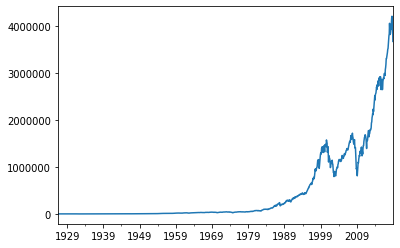

In [19]:
wealth_index.plot.line()

In [20]:
previous_peaks = wealth_index.cummax()

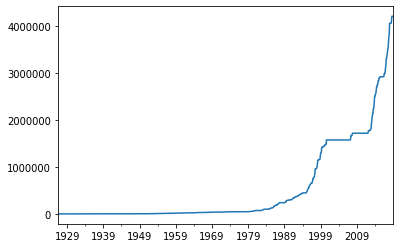

In [21]:
previous_peaks.plot.line()

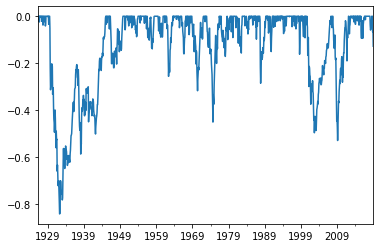

In [23]:
drawdown = (wealth_index - previous_peaks)/previous_peaks
drawdown.plot()

In [30]:
drawdown.head()

1926-07    0.0000
1926-08    0.0000
1926-09    0.0000
1926-10   -0.0243
1926-11    0.0000
Freq: M, Name: large_cap, dtype: float64

In [25]:
drawdown.min()

-0.8400375277943123

In [27]:
# index of the minimum
drawdown["1975":].idxmin()

Period('2009-02', 'M')

In [28]:
drawdown.idxmin()

Period('1932-05', 'M')

In [32]:
def compute_drawdown(returns: pd.Series) -> pd.Series:
    wealth_index = 1000*(1+returns).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdown = (wealth_index - previous_peaks)/previous_peaks
    return pd.DataFrame({
        "wealth": wealth_index,
        "peaks": previous_peaks,
        "drawdown": drawdown
    })

In [33]:
compute_drawdown(rets["large_cap"]).head()

,wealth,peaks,drawdown
1926-07,1032.900000,1032.900000,0.0000
1926-08,1071.117300,1071.117300,0.0000
1926-09,1078.293786,1078.293786,0.0000
1926-10,1052.091247,1078.293786,-0.0243
1926-11,1080.497711,1080.497711,0.0000


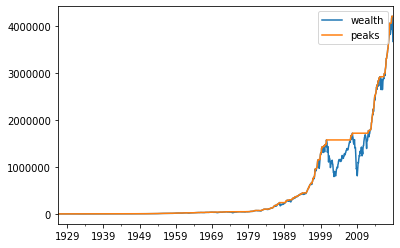

In [35]:
compute_drawdown(rets["large_cap"]).loc[:, ["wealth", "peaks"]].plot()

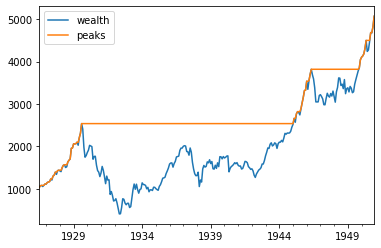

In [36]:
compute_drawdown(rets.loc[:"1950", "large_cap"]).loc[:, ["wealth", "peaks"]].plot()

In [39]:
compute_drawdown(rets["large_cap"]).head()

,wealth,peaks,drawdown
1926-07,1032.900000,1032.900000,0.0000
1926-08,1071.117300,1071.117300,0.0000
1926-09,1078.293786,1078.293786,0.0000
1926-10,1052.091247,1078.293786,-0.0243
1926-11,1080.497711,1080.497711,0.0000


In [50]:
compute_drawdown(rets["large_cap"]).drawdown.min()

-0.8400375277943123

In [49]:
compute_drawdown(rets["small_cap"]).drawdown.min()

-0.8330007793945303

In [48]:
compute_drawdown(rets["large_cap"]).drawdown.idxmin()

Period('1932-05', 'M')

In [47]:
compute_drawdown(rets["small_cap"]).drawdown.idxmin()

Period('1932-05', 'M')

In [46]:
compute_drawdown(rets.loc["1940":, "large_cap"]).drawdown.idxmin()

Period('2009-02', 'M')

In [51]:
compute_drawdown(rets.loc["1940":, "large_cap"]).drawdown.min()

-0.5280945042309305

In [52]:
compute_drawdown(rets.loc["1975":, "large_cap"]).drawdown.idxmin()

Period('2009-02', 'M')

In [53]:
compute_drawdown(rets.loc["1975":, "large_cap"]).drawdown.min()

-0.5280945042309303

In [54]:
compute_drawdown(rets.loc["1975":, "small_cap"]).drawdown.min()

-0.6312068077252386

In [55]:
compute_drawdown(rets.loc["1975":, "small_cap"]).drawdown.idxmin()

Period('2009-02', 'M')